# Interação entre duas molécula de água

Nesta parte dos nossos estudos sobre forças intermoleculares, você realizará uma anaálise similar e obterá energias empregando o método supermolecular e SAPT0 para a interação entre duas moléculas de água. Temos agora mais graus de liberdade: além da distância intermolecular $R$, nós podemos mudar a orientação relativa das duas moléculas ou até mesmo suas geometrias internas (comprimento das ligações O-H e os ângulos H-O-H). desta forma, a curva de energia potencial se torna uma *superfície de energia potencial* multidimensional. É difícil graficar funções de mais de duas variáveis, então vamos nos limitar a estudar a dependência com a distância das energias de interação. Portanto, iremos assumir uma orientação particular de duas moléculas de água (uma que apresente *ligação de hidrogênio*) e variar a distância intermolecular $R$ enquanto mantemos a orientção e geometrias moleculares constante. A geometria do complexo A-B foi pré-definida por mim, mas você terá que pedir todas as informações necessárias para o Psi4 e extraur os números que você precisa. Para poupar tempo, iremos diminuir o conjunto de funções de base para aug-cc-pVDZ e usar o método MP2 (um método aproximado que captura a maior parte da energia perdida pelo método HF conhecida como correlação eletrônuca) no lugar do CCSD(T).

*Dicas:* Para preparar as geometrias das moléculas individuais de água A e B, copie e cole a geometria A-B, mas usa a sintaxe Gh(O2)... para definir os átomos ghosts apropriados. Lembre de colocar `psi4.core.clean()` após cada cálculo.


In [1]:
import sys; sys.path.append("/usr/lib/x86_64-linux-gnu/") 
import time
import numpy as np
import scipy
from scipy.optimize import *
np.set_printoptions(precision=5, linewidth=200, threshold=2000, suppress=True)
import psi4
import matplotlib.pyplot as plt
import seaborn as sns

METODO = 'mp2'
PLOT_INCREMENT = 1.4

# Set Psi4 & NumPy Memory Options
psi4.set_memory('1 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2

psi4.set_options({'basis': 'aug-cc-pVDZ',
              'e_convergence': 1e-10,
              'd_convergence': 1e-10,
              'INTS_TOLERANCE': 1e-15})

/home/dfscalabrini/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (



  Memory set to 953.674 MiB by Python driver.


In [2]:
distances_h2o = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.0,1.5,2.0,2.5,3.0,4.0,5.0,6.0,7.0,8.0,9.0]

hf_r = {}
hf_ra = {}
hf_rb = {}

mp2_r = {}
mp2_ra = {}
mp2_rb = {}


for i in distances_h2o:
  dimero_H2O = """
  0 1
  O          0.11672        """ + str(float(i) + 1.08386) + """        0.00000
  H          0.11672        """ + str(float(i) + 0.12386) + """        0.00000
  H         -0.81270        """ + str(float(i) + 1.32423) + """        0.00000
  --
  0 1
  O         -0.11860       -1.30586        0.00000
  H          0.36284       -1.64297       -0.75906
  H          0.36284       -1.64297        0.75906
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(dimero_H2O)

  # calcula a energia
  psi4.energy(METODO)
  
  hf_r[i] = (psi4.variable('HF TOTAL ENERGY'))
  mp2_r[i] = (psi4.variable(f'{METODO.upper()} TOTAL ENERGY'))

  psi4.core.clean()

  monomer_A = """
  0 1
  O          0.11672        """ + str(float(i) + 1.03386) + """        0.00000
  H          0.11672        """ + str(float(i) + 0.07386) + """        0.00000
  H         -0.81270        """ + str(float(i) + 1.27423) + """        0.00000
  --
  0 1
  Gh(O)         -0.11860       -1.30586        0.00000
  Gh(H)          0.36284       -1.64297       -0.75906
  Gh(H)          0.36284       -1.64297        0.75906
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(monomer_A)

  # calcula a energia
  psi4.energy(METODO)
  
  hf_ra[i] = (psi4.variable('HF TOTAL ENERGY'))
  mp2_ra[i] = (psi4.variable(f'{METODO.upper()} TOTAL ENERGY'))

  psi4.core.clean()

  monomer_B = """
  0 1
  Gh(O)          0.11672        """ + str(float(i) + 1.08386) + """        0.00000
  Gh(H)          0.11672        """ + str(float(i) + 0.12386) + """        0.00000
  Gh(H)         -0.81270        """ + str(float(i) + 1.32423) + """        0.00000
  --
  0 1
  O         -0.11860       -1.30586        0.00000
  H          0.36284       -1.64297       -0.75906
  H          0.36284       -1.64297        0.75906
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(monomer_B)

  # calcula a energia
  psi4.energy(METODO)
  
  hf_rb[i] = (psi4.variable('HF TOTAL ENERGY'))
  mp2_rb[i] = (psi4.variable(f'{METODO.upper()} TOTAL ENERGY'))

  psi4.core.clean()  
  


Completamos os cálculos de energia MP2 para as estruturas A-B, A, and B, e vamos preparar os dados para o gráfico.


HF PEC [7.9976395217693605, 3.4222801056788055, 0.4439060821150739, -1.4336423984625066, -2.563230821946101, -3.191060929358493, -3.4857597754655605, -3.5622240738355386, -3.4994432962386686, -3.158508280259065, -2.1187996041050816, -1.3901282482012263, -0.9448351779252159, -0.6705914909173497, -0.3751954998321008, -0.23173626052604568, -0.15344009283239515, -0.1069651523892382, -0.07759433158955213, -0.05810603363996739]
MP2 PEC [6.054866536395261, 1.7552228944534158, -0.962687885291958, -2.605935432592026, -3.5313150708341787, -3.984973416017928, -4.133319701928785, -4.087931398254705, -3.924079632643158, -3.4295036258033034, -2.1821391931384015, -1.3771161667284477, -0.9087309694594597, -0.6314566158579548, -0.3445322982671496, -0.20956592480337644, -0.1374302023371026, -0.09519382568325889, -0.06874091206326864, -0.051301930145745335]


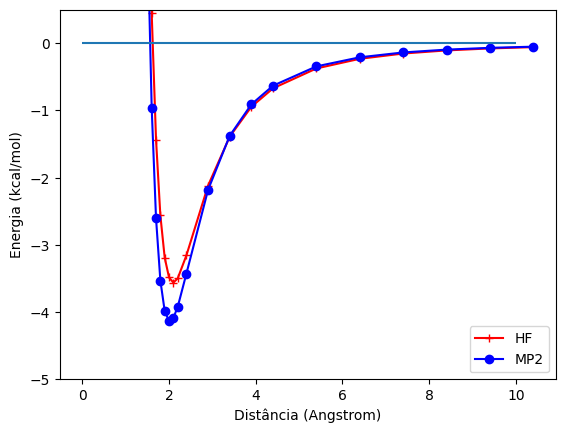

<Figure size 640x480 with 0 Axes>

In [3]:
einthf = []
eintmp2 = []
for i,j in hf_r.items():
    einthf.append((hf_r[i] - (hf_ra[i] + hf_rb[i])) * 627.509)
    eintmp2.append((mp2_r[i] - (mp2_ra[i] + mp2_rb[i])) * 627.509)

PLOT_DISTANCES = []
for i in range(0, len(distances_h2o)): 
    PLOT_DISTANCES.append(distances_h2o[i] + PLOT_INCREMENT)
    
print ('HF PEC', einthf)
print (f'{METODO.upper()} PEC', eintmp2)
plt.plot(PLOT_DISTANCES, einthf,'r+',linestyle='-',label='HF')
plt.plot(PLOT_DISTANCES, eintmp2,'bo',linestyle='-',label=f'{METODO.upper()}')
plt.hlines(0.0,0.0,10.0)
plt.xlabel('Distância (Angstrom)')
plt.ylabel('Energia (kcal/mol)')
plt.ylim(-5.0,0.5)
plt.legend(loc='lower right')
plt.show()
plt.savefig('pec_H2O_dimer.png',dpi=300)